# Plotting

## Setup

In [1]:
%matplotlib inline

import sqlite3
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

## Create DataFrame from SQL Query

In [2]:
connection = sqlite3.connect('../lahman2014.sqlite')

query = '''SELECT CAST(strftime('%Y', debut / 1000, 'unixepoch') as decimal)  year, avg(weight) weight
FROM master
WHERE debut is NOT NULL
GROUP BY year
ORDER BY year'''

df = pd.read_sql_query(query, connection, coerce_float=True, index_col="year")

## Create Plot

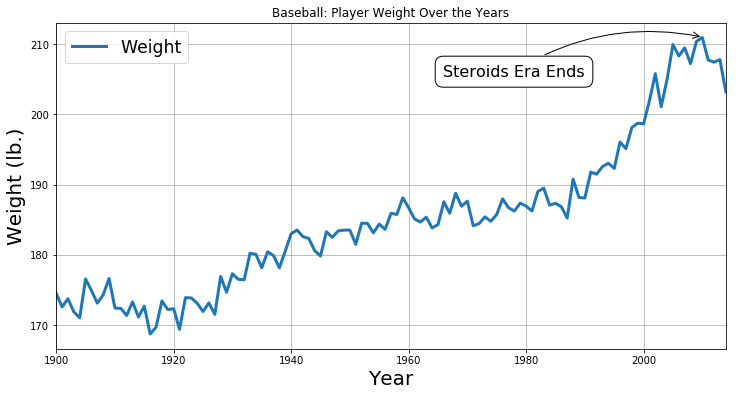

In [3]:
plot = df.plot(title = "Baseball: Player Weight Over the Years",
               figsize=(12,6), lw = 3)

plot.set_ylabel('Weight (lb.)', fontsize=20)
plot.set_xlabel('Year', fontsize=20)
plot.grid(True) 

plot.legend(['Weight'], loc="upper left", fontsize='xx-large')

plot.annotate(
        s = 'Steroids Era Ends', 
        xy = (2010, 211), 
        xytext = (1990, 205),
        ha = 'right', va = 'bottom', fontsize=16,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-.2', color = 'black')
);